# Toyota Corolla

 Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla ("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")


In [1]:
#importing liberies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot 

In [2]:
#loading file
df=pd.read_csv(r"C:\Users\Siddhant Sonawane\Downloads\ToyotaCorolla.csv",encoding='windows-1252')
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
#object of required  columns
toyota=df[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
toyota

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [4]:
#renaming columns
toyota=toyota.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyota.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [5]:
#information of columns
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   CC      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QT      1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [6]:
#checking null values
toyota.isna().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [7]:
#checking duplicates
toyota.duplicated().sum()

1

In [8]:
toyota[toyota.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [9]:
#removing duplicates
toyota1=toyota.drop_duplicates().reset_index()
toyota1=toyota1.drop(['index'],axis=1)
toyota1

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


Descriptive Statistics

In [10]:
toyota.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

Text(0.5, 1.0, 'Weight')

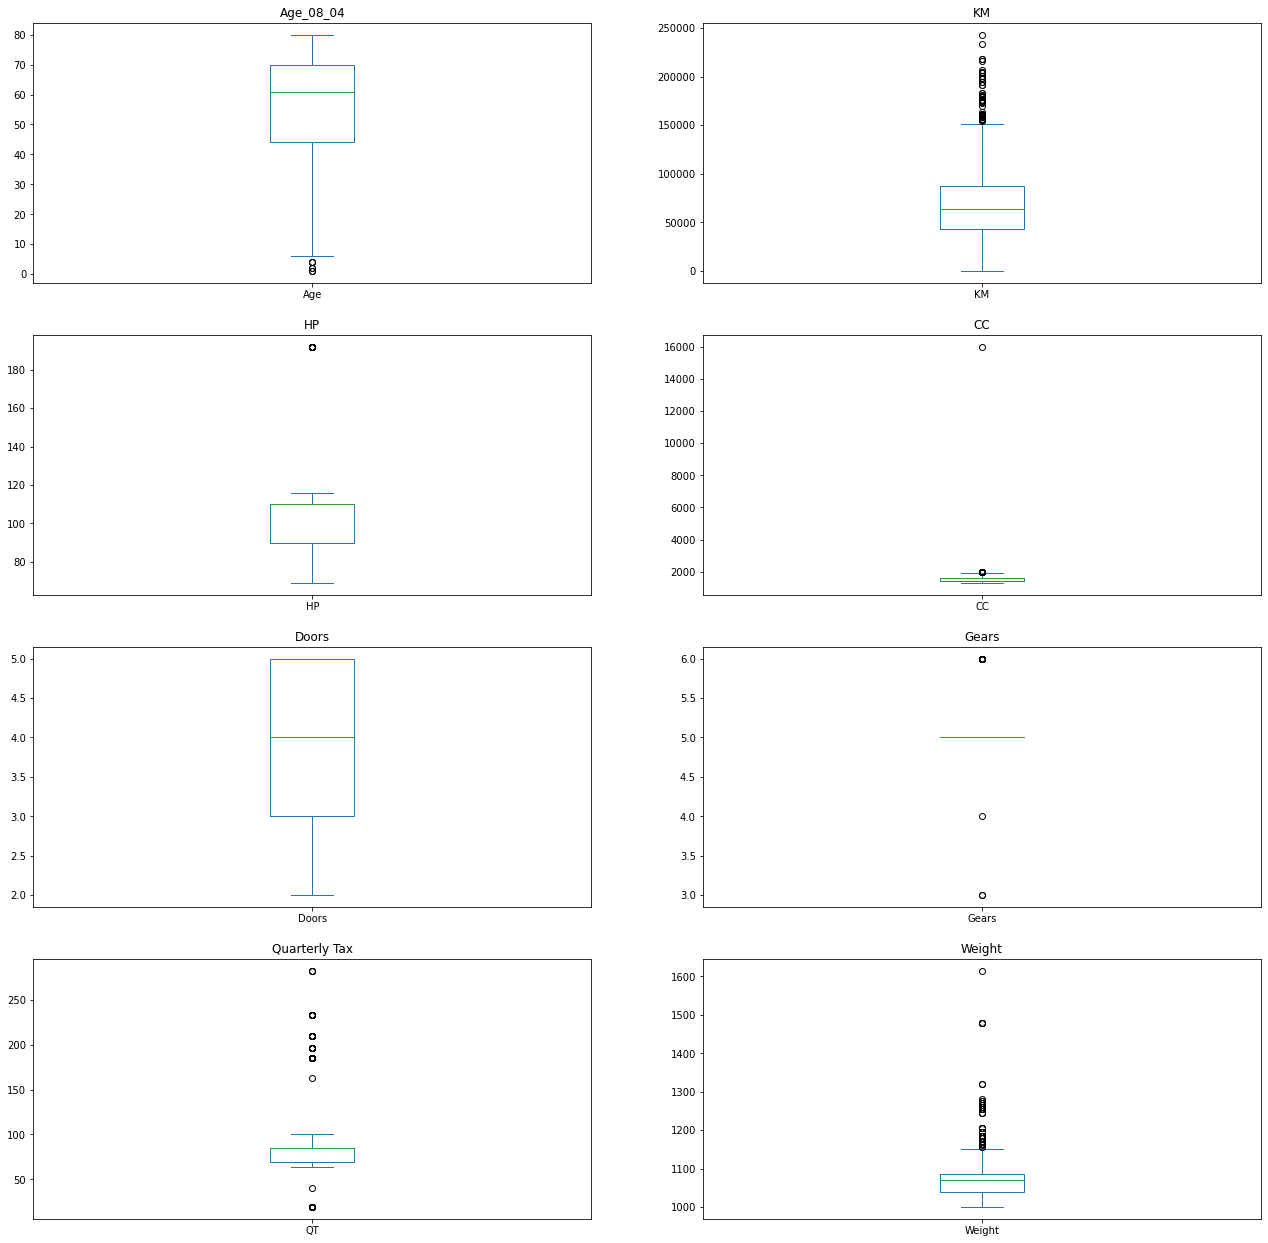

In [11]:
#visualization
plt.figure(figsize=(22,22))
#Age
plt.subplot(4,2,1)
toyota1['Age'].plot(kind='box')
plt.title('Age_08_04')
#KM
plt.subplot(4,2,2)
toyota1['KM'].plot(kind='box')
plt.title('KM')
#HP
plt.subplot(4,2,3)
toyota1['HP'].plot(kind='box')
plt.title('HP')
#CC
plt.subplot(4,2,4)
toyota1['CC'].plot(kind='box')
plt.title('CC')
#Doors
plt.subplot(4,2,5)
toyota1['Doors'].plot(kind='box')
plt.title('Doors')
#Gears
plt.subplot(4,2,6)
toyota1['Gears'].plot(kind='box')
plt.title('Gears')
#QT
plt.subplot(4,2,7)
toyota1['QT'].plot(kind='box')
plt.title('Quarterly Tax')
#Weight
plt.subplot(4,2,8)
toyota1['Weight'].plot(kind='box')
plt.title('Weight')

*We can see the presence of outliers from the above boxplot.Weight and KM has maximum numbers of outliers present as compare to any other input variable.Box plot of HP and QT dose not showing median line it is because both box plot have Q2 eaual to Q3 as shown right below,because of the equalness these quartiles are overlapping.The median of all the box plot are different from each other.

In [12]:
# finding quartiles of HP 
q1 = np.percentile(toyota1['HP'], 25)
q2 = np.percentile(toyota1['HP'],50)
q3 = np.percentile(toyota1['HP'], 75)
print('Q1:',q1 ,'Q2:',q2,'Q3:',q3)

Q1: 90.0 Q2: 110.0 Q3: 110.0


In [13]:
# finding quartiles of QT
q1 = np.percentile(toyota1['QT'], 25)
q2 = np.percentile(toyota1['QT'],50)
q3 = np.percentile(toyota1['QT'], 75)
print('Q1:',q1 ,'Q2:',q2,'Q3:',q3)

Q1: 69.0 Q2: 85.0 Q3: 85.0


Text(0.5, 1.0, 'Weight')

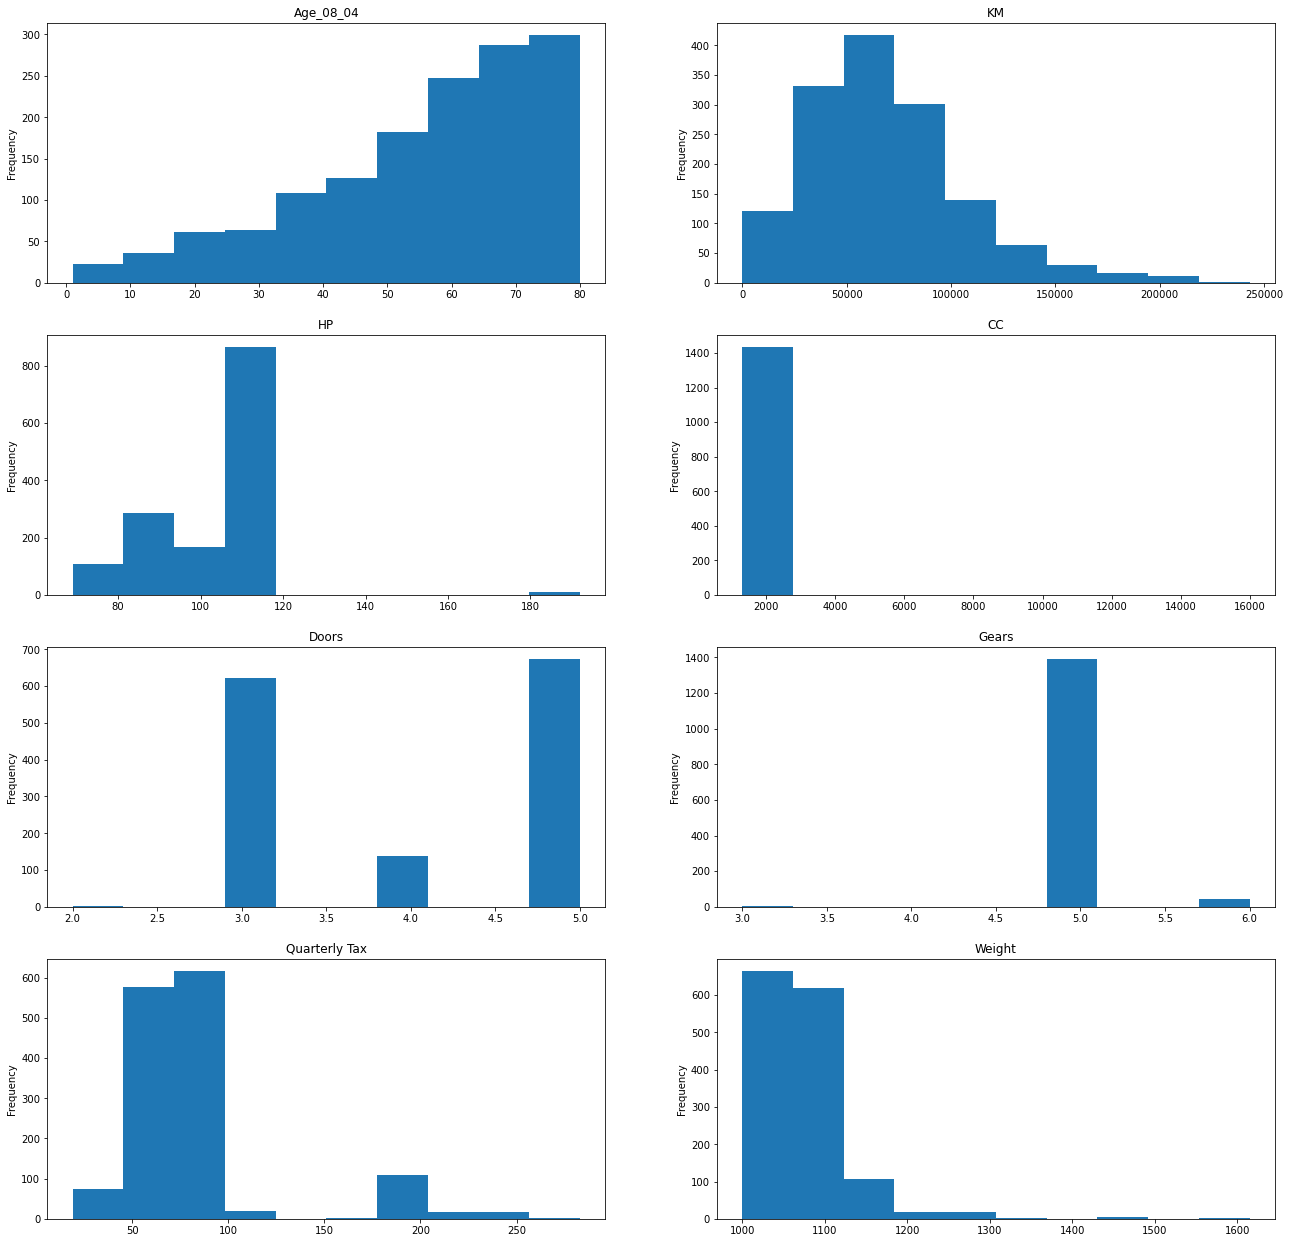

In [14]:
#visualization using histogram
plt.figure(figsize=(22,22))
#Age
plt.subplot(4,2,1)
toyota1['Age'].plot(kind='hist')
plt.title('Age_08_04')
#KM
plt.subplot(4,2,2)
toyota1['KM'].plot(kind='hist')
plt.title('KM')
#HP
plt.subplot(4,2,3)
toyota1['HP'].plot(kind='hist')
plt.title('HP')
#CC
plt.subplot(4,2,4)
toyota1['CC'].plot(kind='hist')
plt.title('CC')
#Doors
plt.subplot(4,2,5)
toyota1['Doors'].plot(kind='hist')
plt.title('Doors')
#Gears
plt.subplot(4,2,6)
toyota1['Gears'].plot(kind='hist')
plt.title('Gears')
#QT
plt.subplot(4,2,7)
toyota1['QT'].plot(kind='hist')
plt.title('Quarterly Tax')
#Weight
plt.subplot(4,2,8)
toyota1['Weight'].plot(kind='hist')
plt.title('Weight')

Histogram and box plot of age_08_04 are both skewed left means most of the data distributed to the right side. Histogram of KM is right skewed implies more data on left side of the histogram. In CC histogram we can see only sigle bar plotted,also in only Gear only one bar i.e. gears around 5 are plotted the most and we can see an outlier around gear 6.In Doors most of the cars are with around doors 3 and 5 and least number of cars with doors around 4.Weight of the toyota is distributed with right skewed more wight is around left side of histogram i.e between 1000-1200,we also see outliers in the weight histogram lying in the right corner (for weight>1200).In HP most of the cars are with horse power 70-120 and above 180 horse power is an outlier.
Quarterly tax is also unevenly distributed between 60-130 and 150-300.outliers are also present in the quarterly tax

In [15]:
toyota1.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [16]:
#removing outliers from the profit
Q1,Q3 = np.percentile(toyota1.Price , [25,75])
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR
outliers = toyota1.Price[(toyota1.Price > ul) | (toyota1.Price < ll)]
outliers

7      18600
8      21500
10     20950
11     19950
12     19600
       ...  
181    21125
182    21500
183    17795
184    18245
522    18950
Name: Price, Length: 109, dtype: int64

Percentage of outliers present in Price is 25%.we cannot remove these much of data directly because These extreme values can impact statistical power as well, making it hard to detect a true effect if there is one.

Correlation matrix

In [17]:
toyota1.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


*From the correlation metric we can see that Age has a strong negative correlation with price. KM has negative moderate correlation with price on the other hand weight has positive moderate correlation with price.HP,CC,Doors and QT have weak correlation with price.

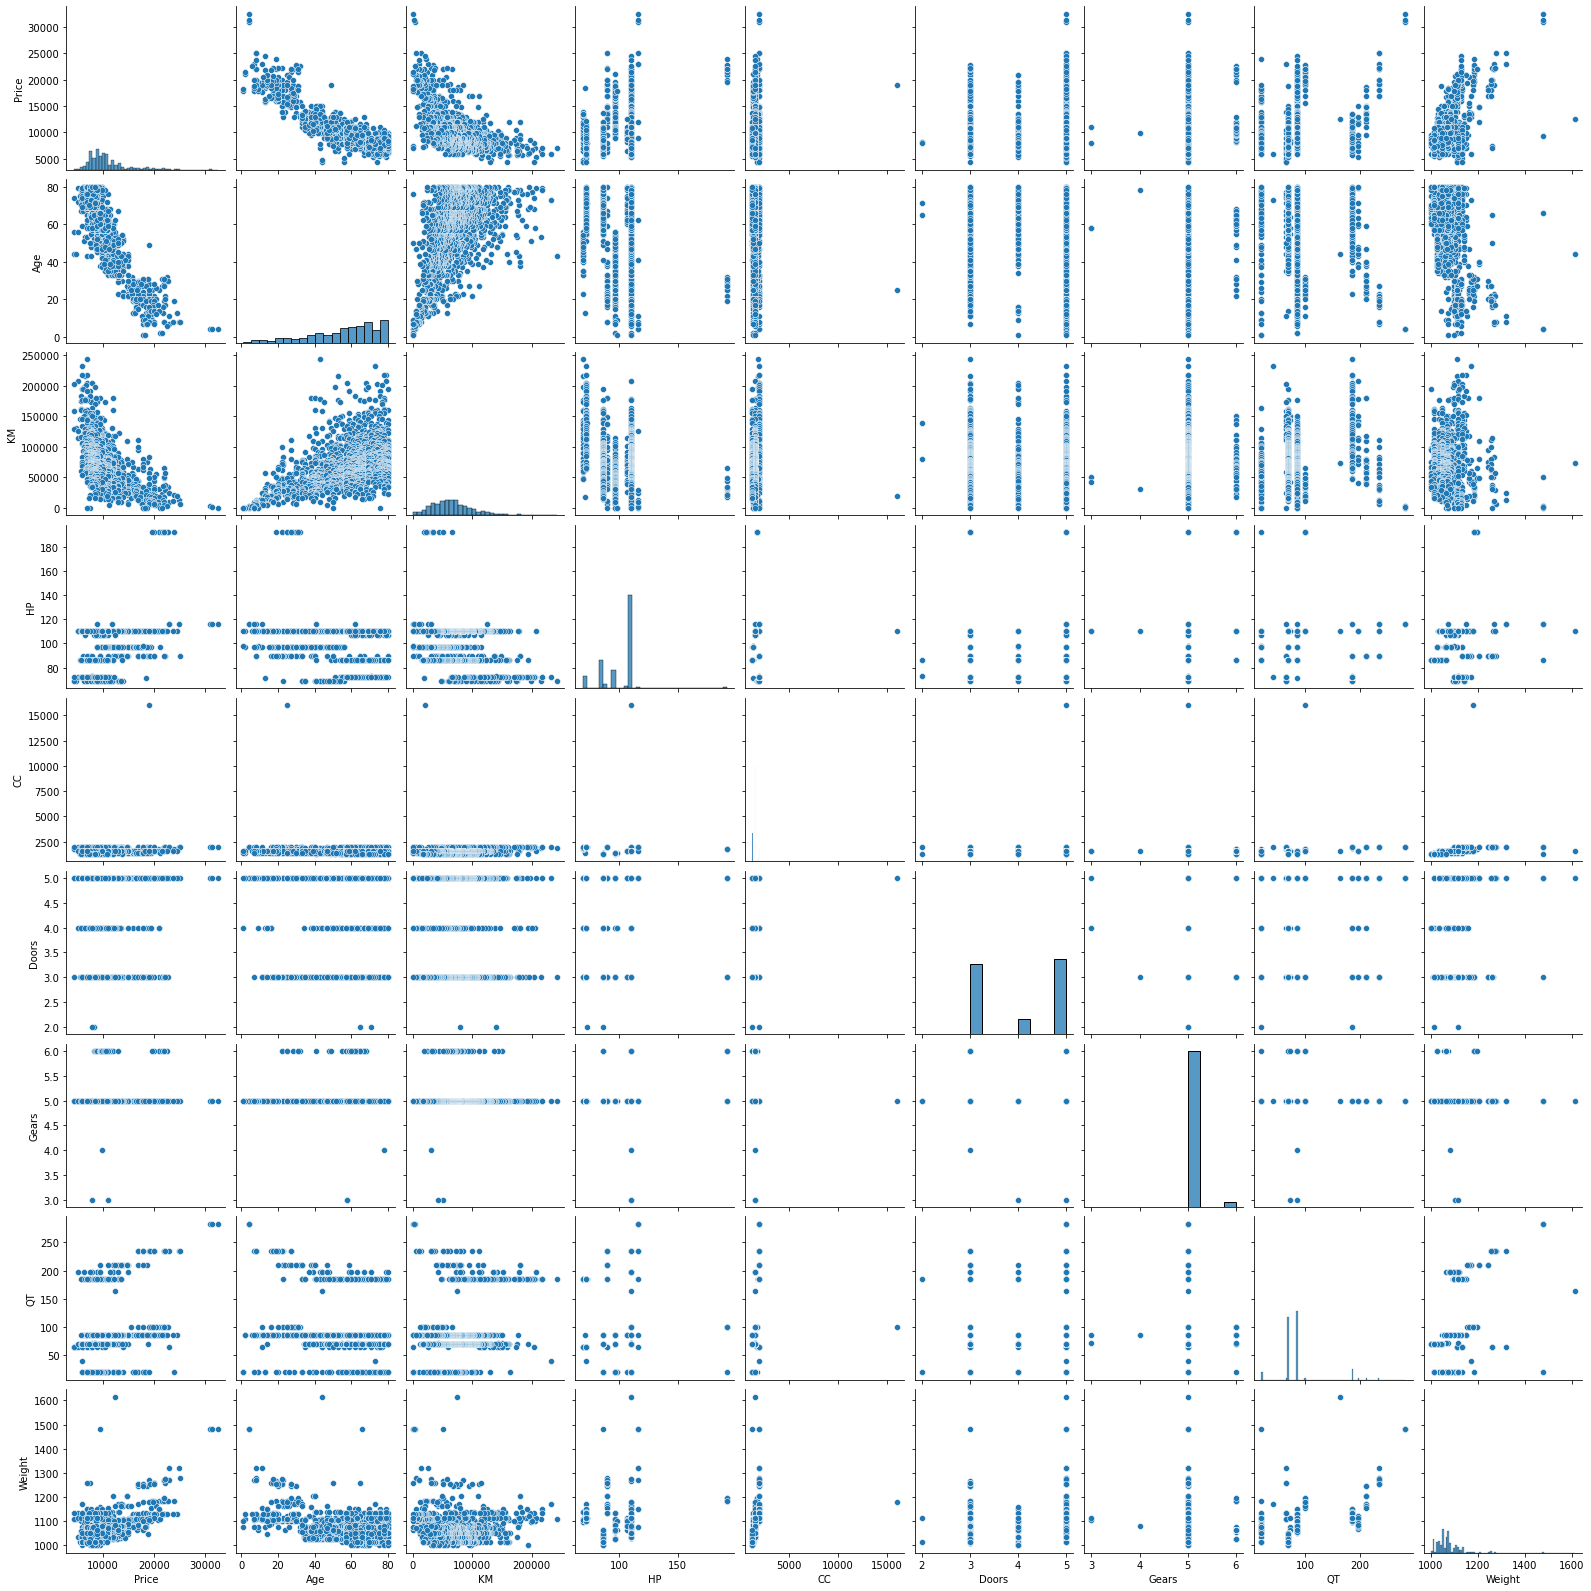

In [18]:
#pair plot to visualize relation amoung the variable
sns.pairplot(toyota1)

Collinearity

In [19]:
#collinearity amoung independent variable
#calculating VIF - to check collinearity

rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyota1).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=toyota1).fit().rsquared
vif_km=1/(1-rsq_KM)

rsq_hp=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=toyota1).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_cc=smf.ols('CC~Age+HP+KM+Doors+Gears+QT+Weight',data=toyota1).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_doors=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=toyota1).fit().rsquared
vif_doors=1/(1-rsq_doors)

rsq_gears=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=toyota1).fit().rsquared
vif_gears=1/(1-rsq_gears)

rsq_q_t=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=toyota1).fit().rsquared
vif_q_t=1/(1-rsq_q_t)

rsq_weight=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=toyota1).fit().rsquared
vif_weight=1/(1-rsq_weight)#calculating VIF - to check collinearity



In [20]:
#DataFrame of VIF
d1=pd.DataFrame({'variable':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
                 'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_q_t,vif_weight]})
d1


,variable,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


All VIF are less than 20 implies no collinearity between independent variable.

# Model building

In [21]:
#model building
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota1).fit()
model

In [22]:
#pvalue 
print(model.pvalues)

#rsquared value
print(model.rsquared,model.rsquared_adj)

Intercept     1.113392e-04
Age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
CC            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QT            3.290363e-03
Weight        1.031118e-51
dtype: float64
0.8625200256947001 0.8617487495415147


In [23]:
#model building excluding insignificant features  
model1=smf.ols('Price~Age+KM+HP+Gears+QT+Weight',data=toyota1).fit()
model1

In [24]:
#pvalue
print(model1.pvalues)

#r^2 values
print(model1.rsquared,model.rsquared_adj)

Intercept     1.415368e-04
Age          8.761584e-289
KM            2.662500e-57
HP            8.360063e-28
Gears         1.895471e-03
QT            4.972130e-03
Weight        8.625126e-55
dtype: float64
0.8623529474112607 0.8617487495415147


In [25]:
model2=smf.ols('Price~Age+KM+HP+Weight',data=toyota1).fit()

#pvalues
print(model2.pvalues)
#r^2 values
print(model2.rsquared,model2.rsquared_adj)

Intercept     4.277518e-05
Age          5.104815e-290
KM            2.006715e-54
HP            3.300468e-31
Weight        3.163110e-98
dtype: float64
0.8605512516617329 0.8601611852328146


In [26]:
model3=smf.ols('Price~Age+KM+Weight',data=toyota1).fit()

#pvalues
print(model3.pvalues)

#r^2 values
print(model3.rsquared,model3.rsquared_adj)

Intercept     7.506510e-02
Age          3.369009e-267
KM            3.128234e-79
Weight       1.322875e-100
dtype: float64
0.8467399730874641 0.8464186732406873


In [27]:
model4=smf.ols('Price~Age+Weight',data=toyota1).fit()

#pvalues
print(model4.pvalues)

#r^2 values
print(model4.rsquared,model4.rsquared_adj)

Intercept    1.521234e-03
Age          0.000000e+00
Weight       6.649917e-54
dtype: float64
0.8035442248423788 0.8032698452681363


In [28]:
model5=smf.ols('Price~Age+KM',data=toyota1).fit()

#pvalues
print(model5.pvalues)

#r^2 values
print(model5.rsquared,model5.rsquared_adj)

Intercept    0.000000e+00
Age          0.000000e+00
KM           1.872211e-32
dtype: float64
0.7895865358054202 0.7892926622520757


In [29]:
model6=smf.ols('Price~Weight+KM',data=toyota1).fit()

#pvalues
print(model6.pvalues)

#r^2 values
print(model6.rsquared,model6.rsquared_adj)

Intercept    2.311209e-100
Weight       1.681091e-198
KM           4.427536e-195
dtype: float64
0.640512953693353 0.6400108768130365


Model with highest r^2_adj value is (smf.ols('Price~Age+KM+HP+Gears+QT+Weight')

In [30]:
final_model=smf.ols('Price~Age+KM+HP+Gears+QT+Weight',data=toyota1).fit()
final_model

In [31]:
#coefficient 
print(model.params)

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64


In [32]:
#pvalues and tvalues
print(final_model.pvalues,'\n',final_model.tvalues)

Intercept     1.415368e-04
Age          8.761584e-289
KM            2.662500e-57
HP            8.360063e-28
Gears         1.895471e-03
QT            4.972130e-03
Weight        8.625126e-55
dtype: float64 
 Intercept    -3.815806
Age         -46.575764
KM          -16.695441
HP           11.163782
Gears         3.111940
QT            2.813212
Weight       16.279604
dtype: float64


In [33]:
#r^2 values
(final_model.rsquared,final_model.rsquared_adj)

(0.8623529474112607, 0.8617745984508038)

Model Validation

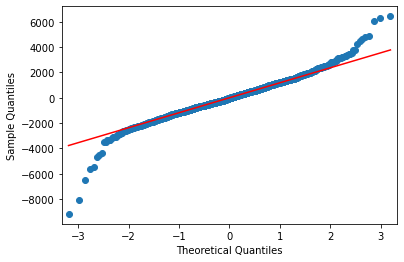

In [34]:
#normality test for residual
import statsmodels.api as sm
qqplot=sm.qqplot(final_model.resid,line='q')
plt.show()

Inference-Most of the data points are on the line implies normal distribution.Also qq-plot shows ouliers on both the tail.

In [35]:
#Homoscedasticity 

def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

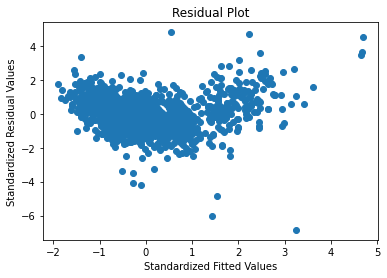

In [36]:
#scatterplot to verify Homoscedasticity 
plt.scatter(get_standardized_values(final_model.fittedvalues),get_standardized_values(final_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

Inference- observing above fig we say that variance of residual is constant

eval_env: 1


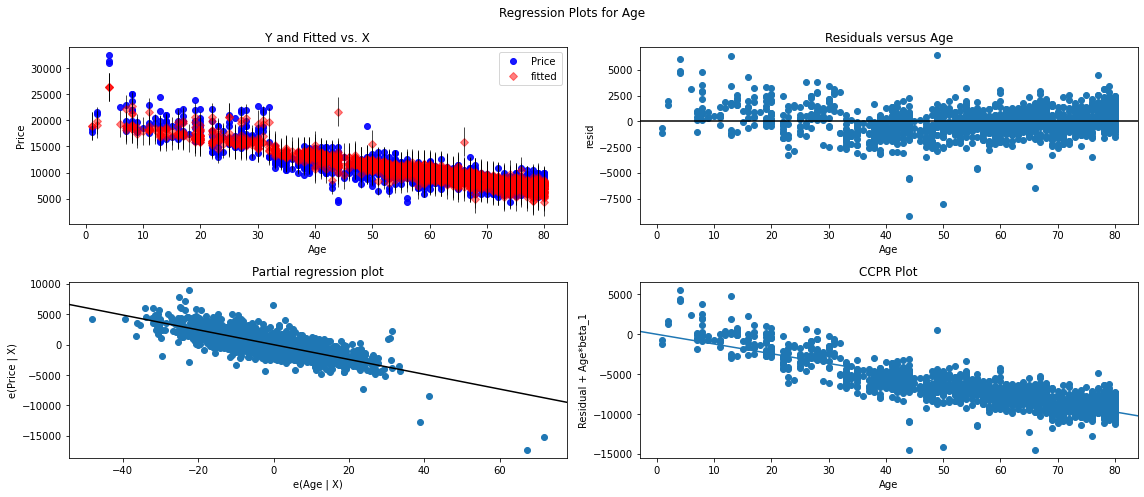

In [37]:
#To check mean=0 we are going to plot residual vs regressor plot
#for Age
fig=plt.figure(figsize=(16,7))
fig=sm.graphics.plot_regress_exog(final_model,'Age',fig=fig)
plt.show()

eval_env: 1


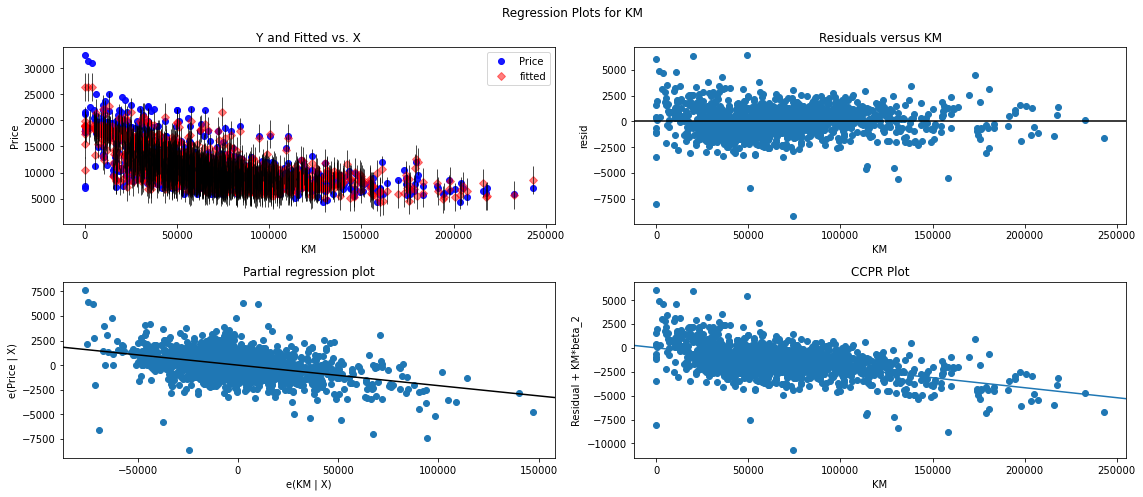

In [38]:
#for KM
fig=plt.figure(figsize=(16,7))
fig=sm.graphics.plot_regress_exog(final_model,'KM',fig=fig)
plt.show()

eval_env: 1


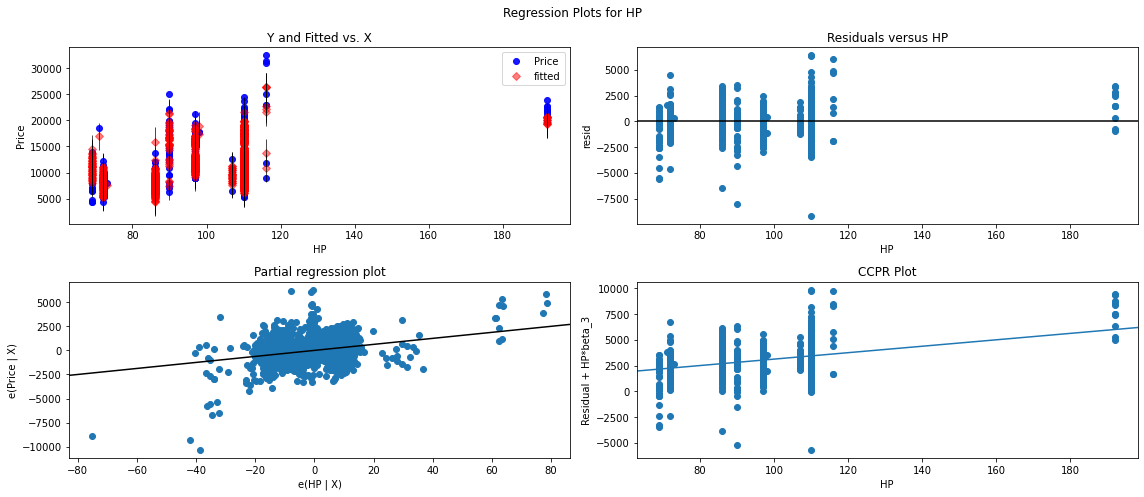

In [39]:
# for HP
fig=plt.figure(figsize=(16,7))
fig=sm.graphics.plot_regress_exog(final_model,'HP',fig=fig)
plt.show()

eval_env: 1


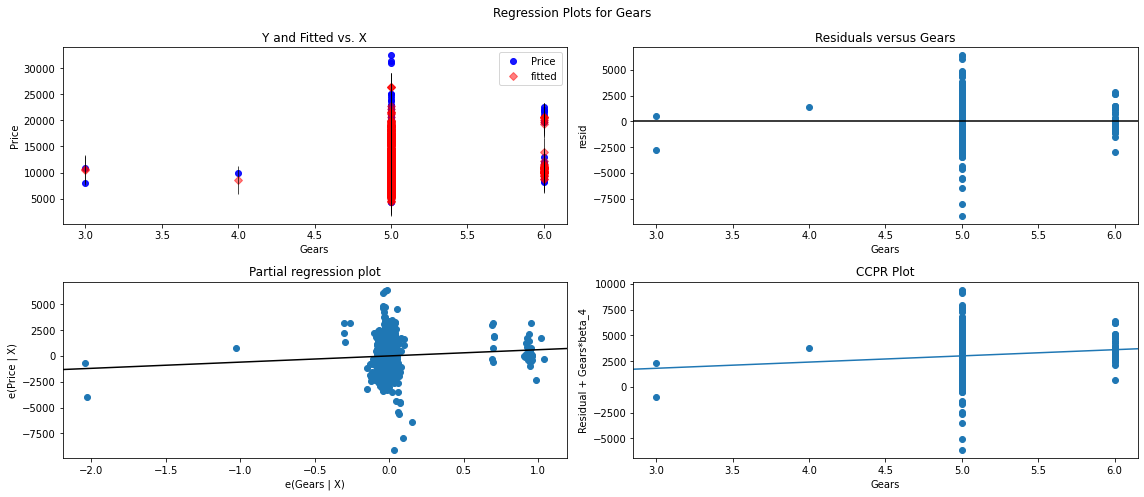

In [40]:
# for Gears
fig=plt.figure(figsize=(16,7))
fig=sm.graphics.plot_regress_exog(final_model,'Gears',fig=fig)
plt.show()

eval_env: 1


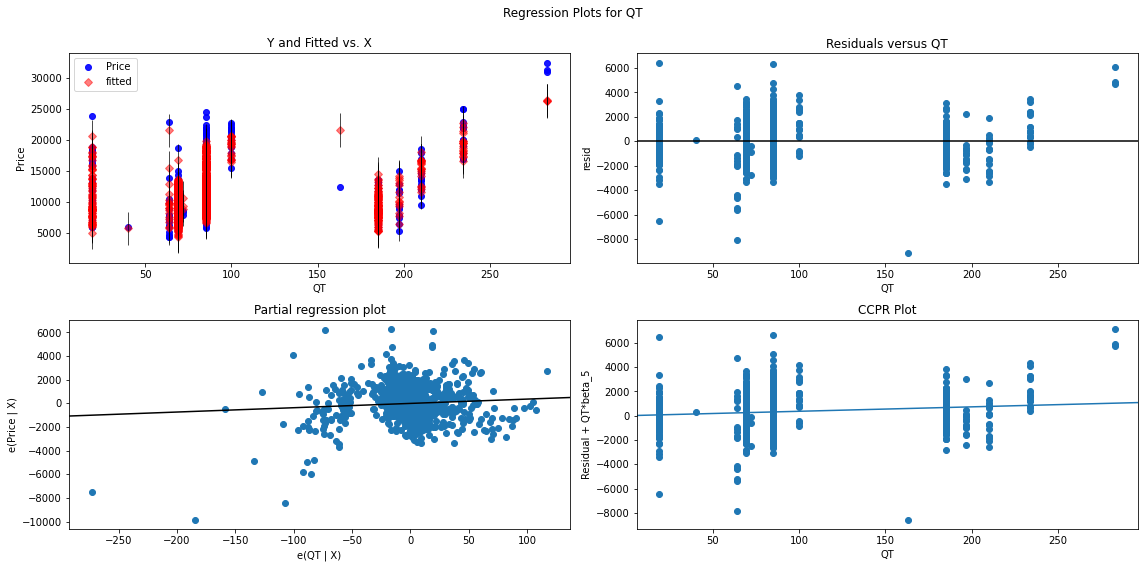

In [41]:
#for quarterlly tax
fig=plt.figure(figsize=(16,8))
fig=sm.graphics.plot_regress_exog(final_model,'QT',fig=fig)
plt.show()

eval_env: 1


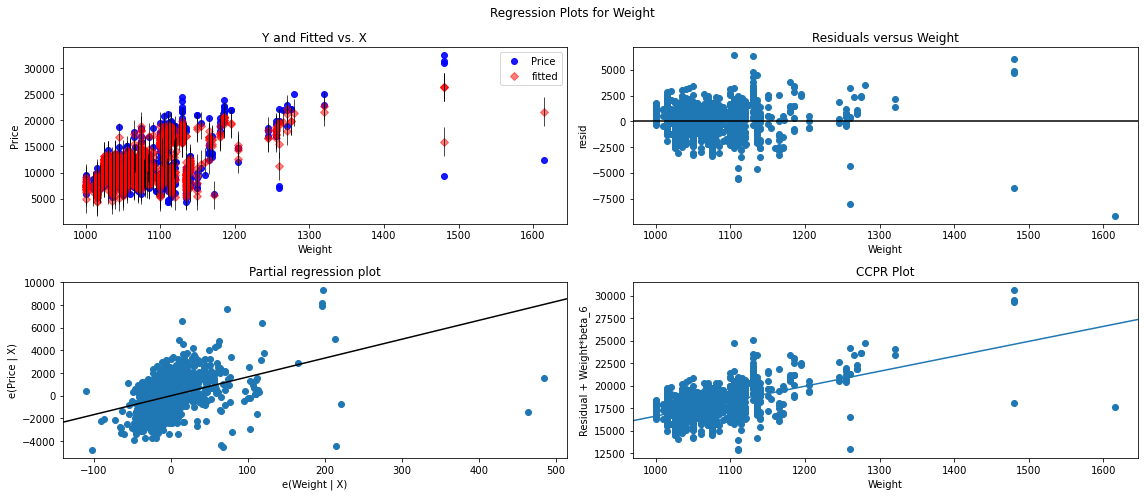

In [42]:
#for weight 
fig=plt.figure(figsize=(16,7))
fig=sm.graphics.plot_regress_exog(final_model,'Weight',fig=fig)
plt.show()

Inference-Observing above graphs we can see that there is no trend in any residual vs regressor plot and the distribution of the points in such way that some points are above the line and some are below the line from this we conclude that mean of error is zero.

Model Deletion Dignostics

In [43]:
#using cooks distance to get influencer points
final_model_influence=final_model.get_influence()
(c,_)=final_model_influence.cooks_distance

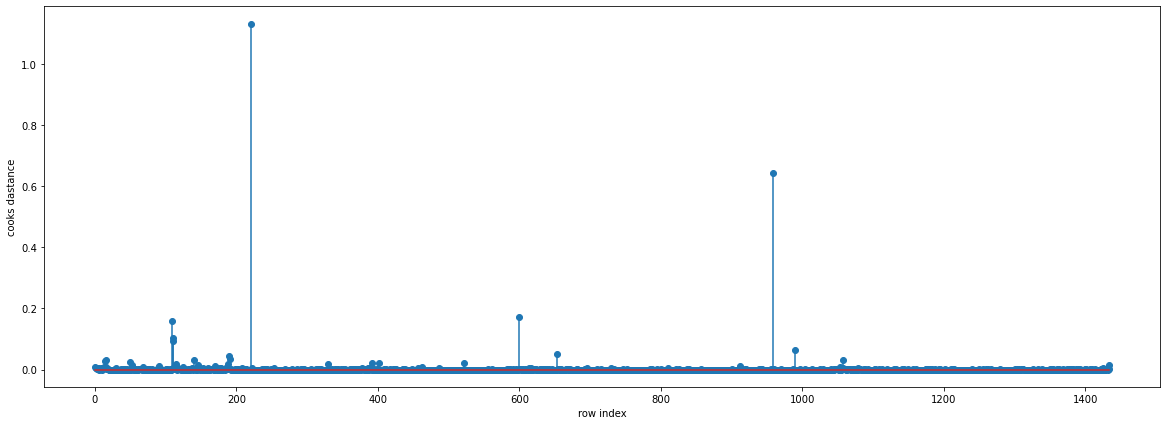

In [44]:
# stem plot to visualize influencer points
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota1)),np.round(c,3))
plt.xlabel('row index')
plt.ylabel('cooks dastance')
plt.show()

In [45]:
(np.argmax(c),np.max(c))

(220, 1.132067092775929)

<Figure size 1440x648 with 0 Axes>

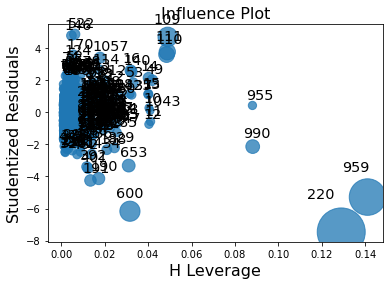

In [46]:
#Using high influence points
from statsmodels.graphics.regressionplots import influence_plot
plt.figure(figsize=(20,9))
influence_plot(final_model)
plt.show()

In [47]:
#leverage cutoff value = 3*(k+1)/n ; k = no.of columns & n = no. of datapoints
k = toyota1.shape[1]
n = toyota1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

Leverage cutoff value is 0.02,all points should lie below this value, otherwise it would be consider as influencer point.

In [48]:
np.where(c>0.02)

(array([  14,   16,   49,  109,  110,  111,  140,  190,  191,  220,  401,
         522,  600,  653,  959,  990, 1057], dtype=int64),)

In [49]:
#droping influencer points
toyota1[toyota1.index.isin([14,   16,   49,  109,  110,  111,  140,  190,  191,  220,  401,
         522,  600,  653,  959,  990, 1057])]


,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
14,22500,32,34131,192,1800,3,6,100,1185
16,22750,30,34000,192,1800,3,5,100,1185
49,21950,31,64982,192,1800,5,6,100,1195
109,32500,4,1,116,2000,5,5,283,1480
110,31000,4,4000,116,2000,5,5,283,1480
111,31275,4,1500,116,2000,5,5,283,1480
140,23950,19,21684,192,1800,5,5,19,1185
190,4350,44,158320,69,1800,5,5,64,1110
191,4750,44,131273,69,1800,5,5,64,1110
220,12450,44,74172,110,1600,5,5,163,1615


In [50]:
toyota2=toyota1.drop(toyota1.index[[14,   16,   49,  109,  110,  111,  140,  190,  191,  220,  401,
         522,  600,  653,  959,  990, 1057]]).reset_index()
toyota2=toyota2.drop(['index'],axis=1)
toyota2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1413,7500,69,20544,86,1300,3,5,69,1025
1414,10845,72,19000,86,1300,3,5,69,1015
1415,8500,71,17016,86,1300,3,5,69,1015
1416,7250,70,16916,86,1300,3,5,69,1015


In [51]:
#improving model
final_model=smf.ols('Price~Age+KM+HP+Gears+QT+Weight',data=toyota2).fit()

#pvalues 
print(final_model.pvalues)

#r^2 values
print(final_model.rsquared,final_model.rsquared_adj)

Intercept     4.982020e-12
Age          3.448544e-296
KM            7.700727e-66
HP            2.028693e-10
Gears         5.161656e-03
QT            2.386163e-03
Weight        2.681894e-76
dtype: float64
0.8782696282437563 0.8777519937784569


In [52]:
#again check for influencer points
final_model_influence=final_model.get_influence()
(c_1,_)=final_model_influence.cooks_distance

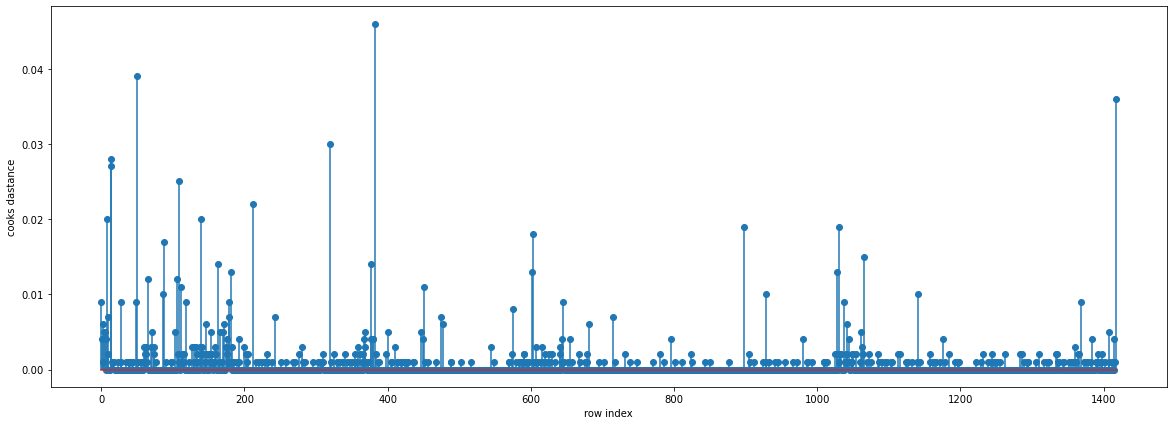

In [53]:
# stem plot to visualize influencer points
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota2)),np.round(c_1,3))
plt.xlabel('row index')
plt.ylabel('cooks dastance')
plt.show()

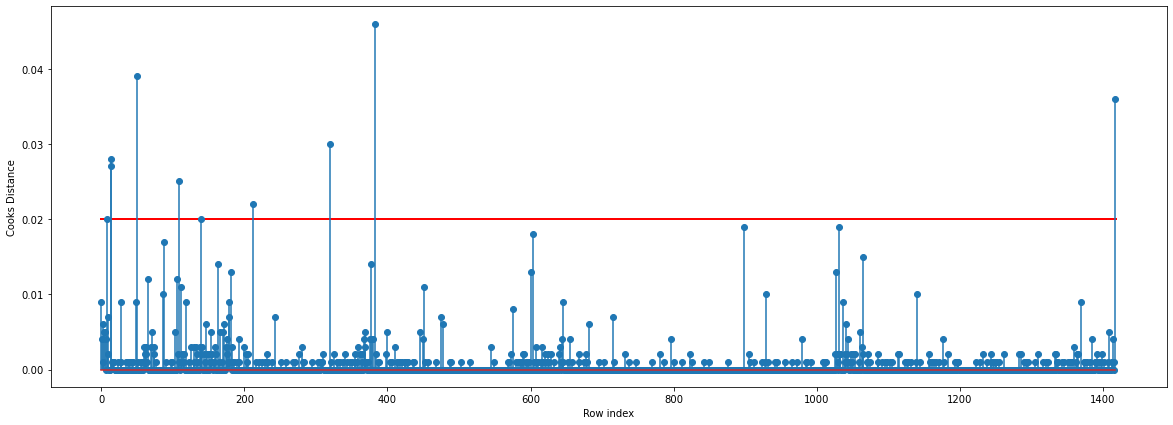

In [54]:
fig = plt.subplots(figsize=(20, 7))

x=[0,1418]
y=[0.02,0.02]
plt.plot(x, y, color = 'red', linewidth = 2)

plt.stem(np.arange(len(toyota2)), np.round(c_1, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [55]:
np.where(c_1>0.02)

(array([  13,   14,   50,  108,  139,  212,  319,  382, 1417], dtype=int64),)

In [56]:
(np.argmax(c_1),np.max(c_1))

(382, 0.04609627430101563)

In [57]:
#droping influencer points
toyota2[toyota2.index.isin([ 13,   14,   50,  108,  139,  212,  319,  382, 1417])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
13,21500,31,23000,192,1800,3,6,100,1185
14,22000,28,18739,192,1800,3,6,100,1185
50,21950,27,49866,192,1800,5,5,100,1195
108,24990,8,6000,90,2000,5,5,234,1280
139,24500,13,19988,110,1600,5,5,85,1130
212,14950,44,71793,110,1600,4,5,197,1067
319,11000,41,33000,110,1600,5,6,19,1075
382,4450,56,129155,69,1800,5,5,64,1110
1417,6950,76,1,110,1600,5,5,19,1114


In [58]:
toyota3=toyota2.drop(toyota2.index[[13,   14,   50,  108,  139,  212,  319,  382, 1417]]).reset_index()
toyota3=toyota3.drop(['index'],axis=1)
toyota3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1404,8450,80,23000,86,1300,3,5,69,1015
1405,7500,69,20544,86,1300,3,5,69,1025
1406,10845,72,19000,86,1300,3,5,69,1015
1407,8500,71,17016,86,1300,3,5,69,1015


In [59]:
#improving model
final_model=smf.ols('Price~Age+KM+HP+Gears+QT+Weight',data=toyota3).fit()

#pvalues 
print(final_model.pvalues)

#r^2 values
print(final_model.rsquared,final_model.rsquared_adj)

Intercept     3.343897e-13
Age          1.476012e-301
KM            7.112758e-69
HP            1.142205e-05
Gears         2.852635e-03
QT            4.225222e-06
Weight        9.754636e-84
dtype: float64
0.8810267917697705 0.8805176339599408


# Prediction

In [60]:
new_data=pd.DataFrame({'Age':55,'KM':4700,'HP':89,'CC':1800,'Doors':4,'Gears':4,'QT':79,'Weight':1140},index=[1])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
1,55,4700,89,1800,4,4,79,1140


In [61]:
final_model.predict(new_data)

1    13144.713413
dtype: float64

In [62]:
final_model.predict(toyota[:5])

0    16342.035814
1    15808.434663
2    16335.533874
3    15976.288624
4    15833.403278
dtype: float64

In [63]:
final_model.predict(toyota)

0       16342.035814
1       15808.434663
2       16335.533874
3       15976.288624
4       15833.403278
            ...     
1431     8975.665630
1432     8419.235440
1433     8574.996012
1434     8692.018017
1435    11344.261886
Length: 1436, dtype: float64

In [64]:
#summary
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1730.
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:43:31   Log-Likelihood:                -11932.
No. Observations:                1409   AIC:                         2.388e+04
Df Residuals:                    1402   BIC:                         2.391e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.095e+04   1489.033     -7.350      0.0